In [23]:
import numpy as np
import os
os.chdir("C:\\Users\Matth\Downloads") #deze moet je aanpassen
import timeit
from pylmnn.bayesopt import find_hyperparams
from pylmnn import LargeMarginNearestNeighbor as hoi
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score



In [15]:
GW = [93,94,95,96,97,104,105,106,113,114,115,116,120,121,122,123,124,128,129,130,139,140,141,146,147,148,156,157,158,164,165,166,167,168,173,174,175,176,177,178,179,182,183,184,185,192,183,194,195,199,200,201,202,276,277,278,279,284,285,286,287,288,293,294,295,302,303,304,311,312
,313,314,315,316,325,326,327,328,333,334,335,336,345,346,347,348,349,350,356,357,358,359,364,365,366,367,368,373,374,375,376,396,397,398,399,441,442,443,444,457,458,459,460,464,465,466,467,468,469,474,475,476,477,482,483,484,485,492,493,494,495,500,501,502,503,504,510,511,512,513,514,518,519,520,521,527,528,529,530,531,532,533,537,538,539,540,544,545,546,547,548,554,555,556,557]

Ctrl = np.zeros(565)

for i in GW:
    Ctrl[i] = 1

Del1 = np.linspace(206,270,65)
Del2 = np.linspace(558,565,8)
Del = np.concatenate((Del1,Del2))

Cont1 = np.delete(Ctrl, Del, 0)
Contractions = Cont1[2:491]
Cont = np.array(Contractions).astype(int)

<IPython.core.display.Javascript object>


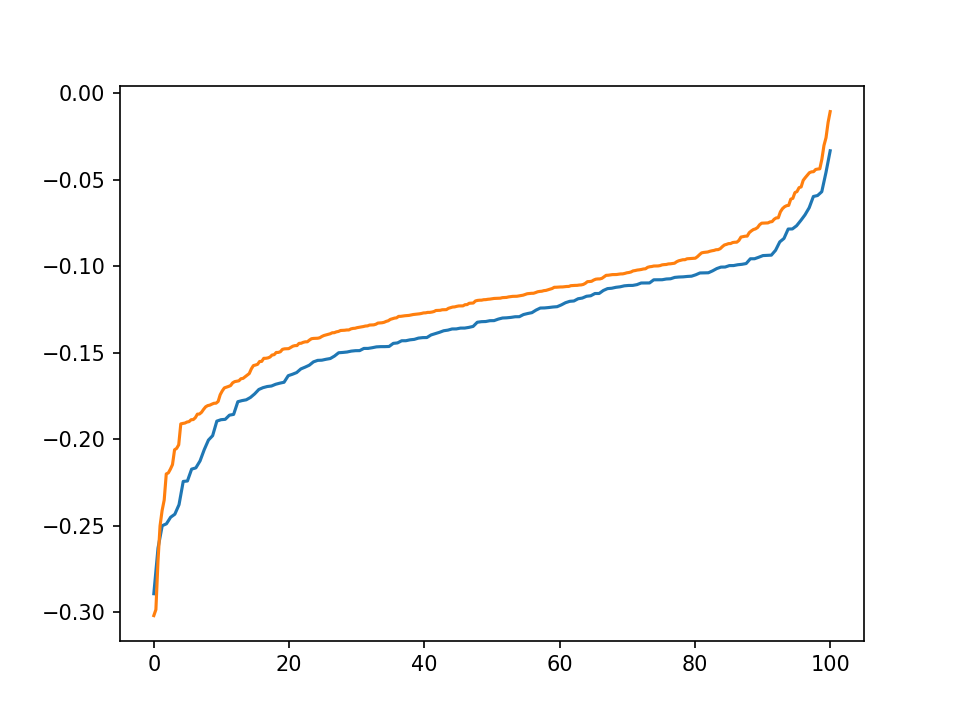

In [156]:
%matplotlib notebook
covariants = pd.read_csv('covariants.csv')
covariants['180'] = Cont #Adding the column of 1s and 0s
covariants['180'] = Cont #extra kolom met 'perfecte' covarianten. om te stoppen met valsspelen: vervang 180 overal door 180

#herschalen naar [-1,1]
#for i in range(180):
    #covariants.iloc[:,i] = covariants.iloc[:,i]/max(abs(covariants.iloc[:,i])) 
    
X = covariants.iloc[:,0:180]
y = covariants[['180']] #handige alternatieve manier om kolommen te selecteren
ones = []
zeros = []
j=108
for i in range(489): 
    if covariants.iloc[:,180][i] == 1:
        ones.append(covariants.iloc[:,j][i])
    else:
        zeros.append(covariants.iloc[:,j][i])
plt.plot(np.linspace(0,100,len(sorted(ones))),sorted(ones))
plt.plot(np.linspace(0,100,len(sorted(zeros))),sorted(zeros))

In [148]:
X.iloc[32]

0       1957.165104
1     -15713.042284
2       -103.072545
3        588.709717
4        379.626294
5       2072.834127
6     -15447.838814
7       -175.952216
8        473.226381
9        405.455208
10      1951.845138
11    -15673.318373
12      -407.806377
13      -276.523856
14       514.938834
15      2025.153190
16    -15241.683591
17        54.603052
18       -29.937472
19       383.756807
20      4981.005928
21    -22650.966540
22       -42.775534
23      -284.768931
24       523.335630
25      5222.521719
26    -22927.274110
27       -69.053265
28      -705.624193
29        84.947857
           ...     
150       13.501857
151        3.830013
152       -2.511481
153        1.972965
154        1.399859
155        0.008792
156       -0.005378
157        0.000350
158       -0.000243
159        0.000655
160    -4272.762930
161     2706.374116
162     -183.760567
163      131.105038
164     -357.213872
165       12.890087
166        3.484856
167       -0.609894
168        1.679288
